In [9]:
pip install sentence-transformers

In [12]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score
import numpy as np


In [13]:
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups

# Define your custom functions
def clust(embeddings, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    predictions = kmeans.fit_predict(embeddings)
    return predictions
def dim_red(embeddings, n_components):
    factor_analysis = FactorAnalysis(n_components=n_components, random_state=42)
    reduced_embeddings = factor_analysis.fit_transform(embeddings)
    return reduced_embeddings


In [14]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)
accuracy = accuracy_score(labels, pred)

print(f'NMI: {nmi_score:.2f}\nAccuracy: {accuracy:.2f}\nARI: {ari_score:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.39
Accuracy: 0.02
ARI: 0.23


In [15]:
eddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 2)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)
accuracy = accuracy_score(labels, pred)

print(f'NMI: {nmi_score:.2f}\nAccuracy: {accuracy:.2f}\nARI: {ari_score:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.30
Accuracy: 0.04
ARI: 0.10


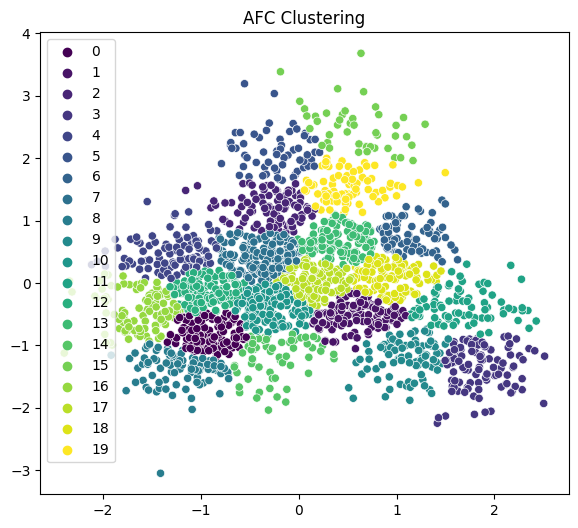

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the results
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=red_emb[:, 0], y=red_emb[:, 1], hue=pred, palette='viridis', legend='full')
plt.title('AFC Clustering')

plt.show()